In [1]:
import time
import numpy as np
import pandas as pd
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
X = np.load("/Users/wajidabdul/courses/cis579/code/muze/torch/process_data/Training_Data/test_x.npy")
y = np.load("/Users/wajidabdul/courses/cis579/code/muze/torch/process_data/Training_Data/test_y.npy")

In [4]:
data = (X/255.).reshape(-1,128*128)
labels = y.reshape(-1,)
print(f"Data Shape: {data.shape}\nLabels Shape: {labels.shape}")

Data Shape: (15989, 16384)
Labels Shape: (15989,)


In [5]:
feat_cols = ['pixel'+str(i) for i in range(data.shape[1]) ]
df = pd.DataFrame(data,columns=feat_cols)
df['y'] = labels
df['label'] = df['y'].apply(lambda i: str(i))
df['label'].replace(to_replace=['0', '1', '2', '3', '4', '5', '6', '7'],
           value= ['Hip-Hop', 'International', 'Electronic', 'Folk', 'Experimental', 'Rock', 'Pop', 'Instrumental'], 
           inplace=True)
data, labels = None, None
print('Size of the dataframe: {}'.format(df.shape)); df

Size of the dataframe: (15989, 16386)


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel16376,pixel16377,pixel16378,pixel16379,pixel16380,pixel16381,pixel16382,pixel16383,y,label
0,1.000000,0.996078,0.988235,0.968627,1.000000,0.917647,0.713725,0.678431,0.776471,0.882353,...,0.450980,0.470588,0.470588,0.447059,0.450980,0.490196,0.537255,0.556863,4,Experimental
1,0.678431,0.698039,0.713725,0.717647,0.737255,0.749020,0.698039,0.631373,0.592157,0.619608,...,0.294118,0.325490,0.376471,0.411765,0.427451,0.439216,0.470588,0.505882,6,Pop
2,1.000000,0.933333,0.780392,0.741176,0.745098,0.764706,0.843137,0.847059,0.886275,0.921569,...,0.733333,0.725490,0.745098,0.749020,0.666667,0.564706,0.568627,0.643137,6,Pop
3,0.509804,0.600000,0.650980,0.705882,0.674510,0.607843,0.635294,0.631373,0.635294,0.549020,...,0.741176,0.760784,0.760784,0.764706,0.764706,0.721569,0.709804,0.752941,1,International
4,0.772549,0.772549,0.768627,0.768627,0.792157,0.800000,0.768627,0.729412,0.729412,0.698039,...,0.564706,0.533333,0.556863,0.588235,0.564706,0.564706,0.596078,0.607843,3,Folk
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15984,1.000000,1.000000,1.000000,0.992157,0.992157,0.984314,0.945098,0.898039,0.913725,0.905882,...,0.537255,0.552941,0.564706,0.545098,0.513725,0.501961,0.521569,0.545098,3,Folk
15985,0.705882,0.776471,0.890196,1.000000,0.996078,0.850980,0.768627,0.815686,1.000000,1.000000,...,0.513725,0.478431,0.407843,0.482353,0.650980,0.505882,0.470588,0.411765,6,Pop
15986,0.745098,0.800000,0.807843,0.776471,0.823529,0.937255,0.996078,0.976471,0.996078,0.968627,...,0.192157,0.145098,0.164706,0.250980,0.290196,0.266667,0.270588,0.317647,0,Hip-Hop
15987,0.533333,0.513725,0.509804,0.521569,0.521569,0.545098,0.647059,0.760784,0.752941,0.768627,...,0.501961,0.552941,0.635294,0.529412,0.478431,0.525490,0.470588,0.470588,2,Electronic


In [11]:
# For reproducability of the results
np.random.seed(42)
rndperm = np.random.permutation(df.shape[0])

<Figure size 640x480 with 0 Axes>

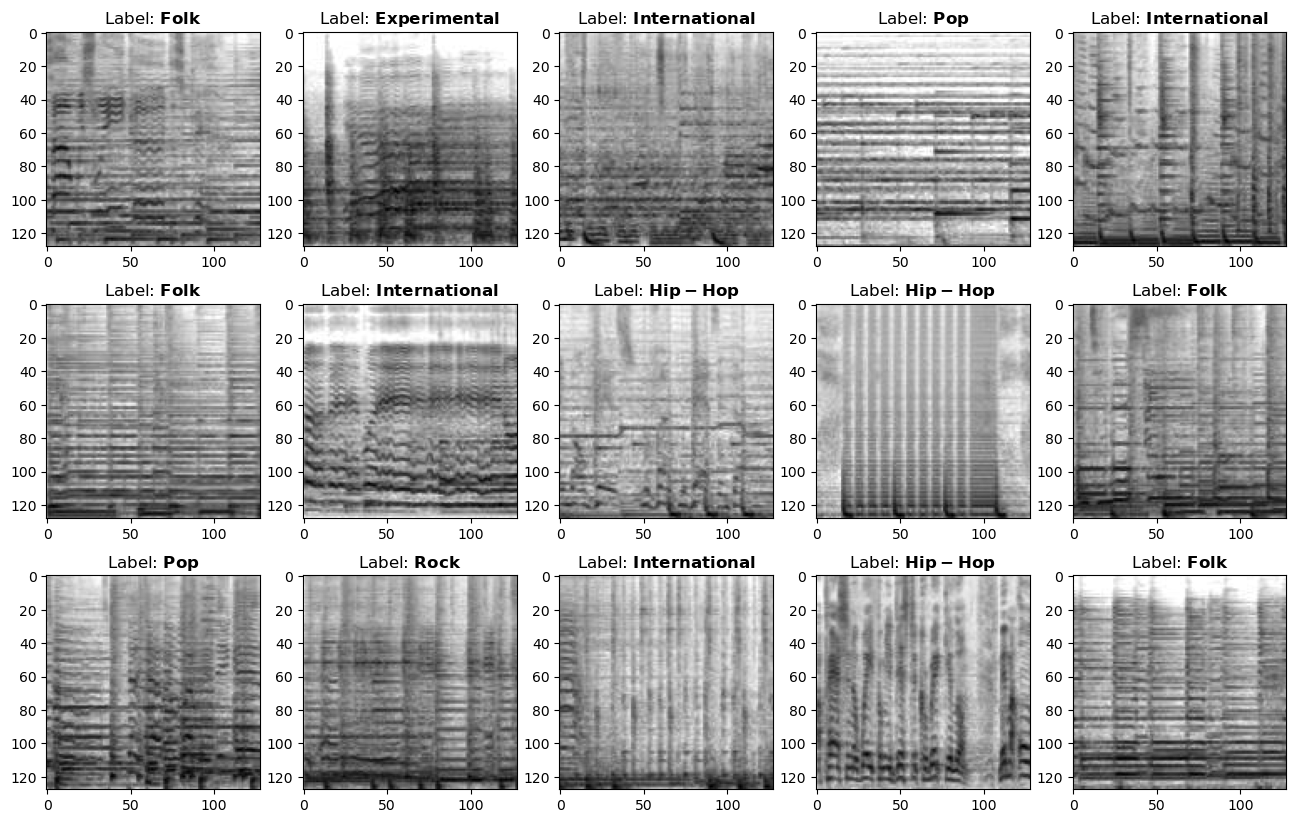

In [7]:
plt.gray()
fig = plt.figure( figsize=(16,10) )
for i in range(0,15):
    ax = fig.add_subplot(3,5,i+1)
    ax.set_title(r"Label: $\bf{}$".format(str(df.loc[rndperm[i],'label'])))
    ax.imshow(df.loc[rndperm[i],feat_cols].values.reshape((128,128)).astype(float))
plt.show()

In [8]:
N = 3998
df_subset = df.loc[rndperm[:N],:].copy()
data_subset = df_subset[feat_cols].values ; len(data_subset)

3998

In [10]:
# Using t-SNE to reduce high-dimensional data "http://www.jmlr.org/papers/volume9/vandermaaten08a/vandermaaten08a.pdf"
time_start = time.time()
# configuring the parameteres
tsne = TSNE(n_components=2, verbose=1, perplexity=10, n_iter=800 )
tsne_results = tsne.fit_transform(data_subset)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 3998 samples in 0.296s...


AttributeError: 'NoneType' object has no attribute 'split'

In [25]:
# creating a new data frame which help us in ploting the result data
tsne_data = np.vstack((tsne_results.T, df_subset['label'])).T; tsne_data

array([[-0.15984685719013214, -7.80889892578125, 'Folk'],
       [10.375699996948242, 4.026370525360107, 'Instrumental'],
       [-17.44463539123535, -9.177078247070312, 'Instrumental'],
       [-16.577402114868164, -15.72853946685791, 'Folk'],
       [2.467533826828003, 5.423254489898682, 'Pop'],
       [-6.301208972930908, 0.286194771528244, 'Instrumental'],
       [6.501721382141113, 2.7637016773223877, 'Instrumental'],
       [-8.786419868469238, -3.9390459060668945, 'Instrumental'],
       [3.1989331245422363, 9.800700187683105, 'Rock'],
       [-16.576236724853516, -6.983694076538086, 'Instrumental'],
       [-6.609333515167236, -2.6373653411865234, 'International'],
       [14.698365211486816, -3.3054370880126953, 'Experimental'],
       [-12.356897354125977, -17.122106552124023, 'Folk'],
       [11.870368957519531, 8.077101707458496, 'Electronic'],
       [2.0655505657196045, 8.093770980834961, 'Rock'],
       [-10.000892639160156, -7.030430793762207, 'International'],
       [

In [26]:
# Ploting the result of tsne
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))
sns.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.show()

TypeError: FacetGrid.__init__() got an unexpected keyword argument 'size'